In [53]:
import os
import time
import math
import re
import struct
import traceback
import codecs
import io

import bitstring

import numpy as np
import matplotlib.pyplot as plt
# import cv2
import pandas as pd

from PIL import Image
import IPython.display as display

from list_char import JIS0208

In [58]:
file_list = [
    'ETL8B' + '/ETL8B2C1',
    'ETL8B' + '/ETL8B2C2',
    'ETL8B' + '/ETL8B2C3',
]

filename = file_list[2]
file_stream = bitstring.ConstBitStream(filename = filename)
record = file_stream.readlist('int:16,uint:16,uint:32,bytes:504')
record_dict = {
    'sheet_number': record[0], # type: int - Serial Sheet Number
    'JIS_KANJI_CODE': record[1], # type: binary - JIS Kanji Code (JIS X 0208)
    'JIS_READING': record[2], # type: ASCII - JIS Typical Reading (e.g. 'AI.M')
    'image_data': record[3], # type: bytes
}



<h4> The First Record of each file is zero padded dummy </h4>

538976288
null_8224


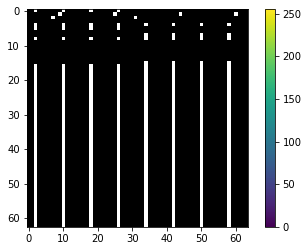

In [59]:
IMG_WIDTH = 64
IMG_HEIGHT = 63

# Extract Unicode
char_code = record_dict['JIS_KANJI_CODE']
if char_code in JIS0208:
    unicode_char = JIS0208[char_code]
else:
    unicode_char = 'null_' + repr(char_code)

jis_reading = record[2]
print(jis_reading)
print(unicode_char)

pil_image = Image.frombytes('1', (IMG_WIDTH, IMG_HEIGHT), record_dict['image_data'], 'raw')
buffer = io.BytesIO()
pil_image.save(buffer, format='PNG')
plt.imshow(pil_image)
plt.colorbar()

In [60]:
total_sample = 0
record_count = {}

for filename in file_list:
    file_stream = bitstring.ConstBitStream(filename = filename)
file_stream

ConstBitStream(filename='ETL8B/ETL8B2C3', length=211013632)

In [61]:
hex(record_dict['JIS_KANJI_CODE'])

'0x2020'

In [68]:
from katakana import katakana_char

total_sample = 0
record_count = {}
for filename in file_list:
    file_stream = bitstring.ConstBitStream(filename=filename)
    # Skip First Record Each 8B script
    file_stream.readlist('bytes:512')
    
    while True:
        try:
            record = file_stream.readlist('int:16,int:16,uint:32,bytes:504')
        except:
            break
            
        total_sample += 1
        
        jis_code = record_dict['JIS_KANJI_CODE']
        if jis_code in JIS0208.keys():
            unicode_char = JIS0208[jis_code]
        else:
            unicode_char = 'JIS_CODE=' + repr(jis_code)
            
        jis_reading = record[2]
        print(hex(jis_code), record_dict['JIS_READING'])

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 538976288
0x2020 5389762

In [49]:
chr(53)

'5'

In [50]:
chr(89)

'Y'

In [51]:
chr(76)

'L'

In [52]:
chr(28)

'\x1c'